<a href="https://colab.research.google.com/github/anuragkadian/Topic-modelling/blob/main/BERTopic_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!pip install bertopic

     |████████████████████████████████| 57 kB 4.0 MB/s 
     |████████████████████████████████| 5.2 MB 33.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 86 kB 5.4 MB/s 
     |████████████████████████████████| 79 kB 8.1 MB/s 
     |████████████████████████████████| 3.8 MB 43.0 MB/s 
     |████████████████████████████████| 1.2 MB 44.7 MB/s 
     |████████████████████████████████| 67 kB 4.3 MB/s 
     |████████████████████████████████| 895 kB 50.5 MB/s 
     |████████████████████████████████| 6.5 MB 38.7 MB/s 
     |████████████████████████████████| 636 kB 48.0 MB/s 
     |████████████████████████████████| 1.1 MB 64.2 MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2330875 sha256=4cdc41aace2bd6a9503d4fd11f4fea658f525e71a873ec369f49b45c0c68bb58
  Stored in directory: /root/.cache/pip/wheels/6e/7a/5e/259ccc841c085fc41b99ef

In [2]:
!pip install texthero

     |████████████████████████████████| 235 kB 42.9 MB/s 
     |████████████████████████████████| 1.5 MB 46.3 MB/s 
     |████████████████████████████████| 749 kB 49.4 MB/s 
  Attempting uninstall: regex
    Found existing installation: regex 2019.12.20
    Uninstalling regex-2019.12.20:
      Successfully uninstalled regex-2019.12.20
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [3]:
import pandas as pd
import numpy as np
import texthero as hero

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
df = pd.read_csv("Q37 OTs v2.csv")
df.head(5)

,Reviews
0,zero i do not trade ever from a mobile
1,You have done a great job of establishing a cl...
2,Yes its easy to use
3,Yes
4,Wide range of different stocks App easy to use


In [5]:
hero.top_words(df["Reviews"].pipe(hero.clean))

mobile        82
app           69
use           66
trading       56
trade         56
              ..
stressful      1
cityindex      1
horrible       1
monitoring     1
keen           1
Name: Reviews, Length: 1224, dtype: int64

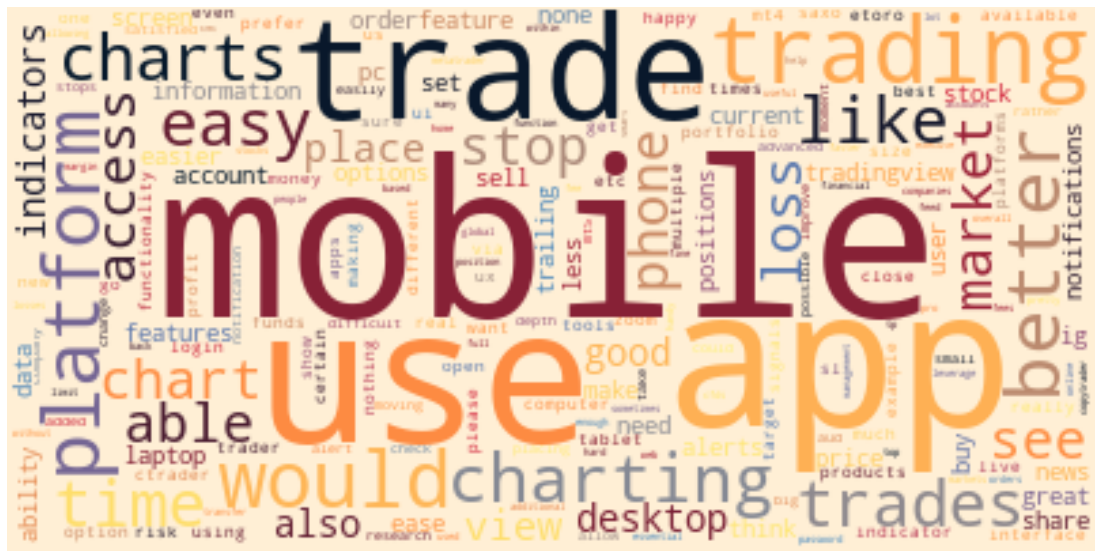

In [6]:
hero.wordcloud(df["Reviews"].pipe(hero.clean))

In [7]:
df['clean_reviews'] = df["Reviews"].pipe(hero.clean)

In [8]:
docs = df['clean_reviews']
docs

0                                 zero trade ever mobile
1      done great job establishing clean ui would lik...
2                                           yes easy use
3                                                    yes
4               wide range different stocks app easy use
                             ...                        
418    ai driven platform could assist trader put mar...
419    maybe trading view access position size sl pre...
420    good advanced charting volume research assista...
421              convenience use phone trade anywhere go
422                           keen using mobile platform
Name: clean_reviews, Length: 423, dtype: object

In [11]:
from bertopic import BERTopic

In [12]:
topic_model = BERTopic()

topics, probs = topic_model.fit_transform(docs)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [13]:
topic_model.get_topic_info()
topic_model.visualize_topics()

In [14]:
topic_model.get_topic_info()

,Topic,Count,Name
0,-1,136,-1_app_mobile_use_trade
1,0,40,0_charting_chart_charts_better
2,1,38,1_news_charts_see_market
3,2,36,2_mobile_platform_app_use
4,3,35,3_trading_mobile_trade_use
5,4,29,4_better_security_easier_good
6,5,23,5_nothing_happy_good_satisfied
7,6,23,6_trading_trade_tradingview_view
8,7,19,7_stop_loss_trailing_take
9,8,18,8_margin_lower_deposit_less
